# Fundamentals of Probabilistic Data Mining : Graded lab

## Preparatory work


$\textbf{1. Derive the reestimation formula for Gaussian Mixture Model }$

We consider $x=(x_1,x_2,...,x_n)$ a sample of  n independent observations from a mixture of k multivariate normal distributions of dimension d.

incomplete likelihood for multivariate mixture of k Gaussian of dimension d :

$$l(\theta;x)=\prod_{i=1}^n \sum_{j=1}^k \pi_j f(x_i;\mu_j, \Sigma_j) $$

the complete likelihood is then :

$$l(\theta;x,z)=\prod_{i=1}^n \sum_{j=1}^k (\pi_j f(x_i;\mu_j, \Sigma_j))^{I(z_i=j)} $$

with the $z_j$ the latent variables, here they are the hidden label of our data.

the log-likelihood is then :

$$L(\theta;x,z)=\sum_{i=1}^n \sum_{j=1}^k I(z_i=j) [\log(\pi_j) - \frac{1}{2} \log(\Sigma_j) - \frac{1}{2} (x_i-\mu_j)^T \Sigma_j^{-1}(x_i-\mu_j)-\frac{d}{2} \log{2 \pi} ] $$

### E part

   
By the Bayes' theorem we have : $P(Z_i = j | X_i = x_i ; \theta^{(t)}) = \frac{\pi_j^{(t)} f(x_i; \mu_j^{(t)} , \sigma_j^{(t)})}{\sum_{c = 1}^{k} \pi_c^{(t)} f(x_i; \mu_c^{(t)} , \sigma_c^{(t)}) }$



We set $Q(\theta|\theta^{(t)})$ as : 

\begin{equation}
    \begin{split}
    Q(\theta|\theta^{(t)}) & = E_{Z|X,\theta^{(t)}} \left[ log L(\theta; x,Z) \right] \\
    & = E_{Z|X,\theta^{(t)}} \left[ log \prod\limits_{i=1}^{n} L(\theta; x_i,Z_i) \right] \\
    & = E_{Z|X,\theta^{(t)}} \left[ \sum\limits_{i=1}^n log L(\theta; x_i,Z_i) \right] \\
    & =  \sum\limits_{i=1}^n E_{Z|X,\theta^{(t)}} \left[ log  L(\theta; x_i,Z_i) \right]\\
    & =  \sum\limits_{i=1}^n \sum\limits_{j=1}^k P(Z_i = j | X_i = x_i; \theta^{(t)}) log L(\theta; x_i,j)]
    \end{split}
\end{equation}


### M part

We can maximise the terms containing all the $\pi_k$ independently from the rest since they are all in independent linear part of the equation. 
We can do the same for each linear term containing $(\mu_k, \Sigma_k)$ for every k.

Let's first estimate $(\mu_1, \Sigma_1)$ :

\begin{align*}
    (\mu_1^{t+1}, \Sigma_1^{t+1})
    & = argmax_{\mu_1,\Sigma_1} Q(\theta|\theta^{(t)}) \\
    & = argmax_{\mu_1,\Sigma_1} \sum_{i=1}^n T_{1,i}^t 
     (- \frac{1}{2} \log(\Sigma_1) - \frac{1}{2} (x_i-\mu_1)^T \Sigma_1^{-1}(x_i-\mu_1))
\end{align*}

We note that it has the same form as a weighted maximum likelihood estimator for a normal distribution, we can then deduce :

$$ \mu_1^{t+1} = \frac{\sum_{i=1}^n T_{1,i} x_i}{\sum_{i=1}^n T_{1,i}} $$

$$ \Sigma_1^{(t+1)} = \frac{\sum_{i=1}^n T_{1,i}^t 
      (x_i-\mu_1^{t+1}) (x_i-\mu_1^{t+1})^T}{\sum_{i=1}^n T_{1,i}^t} $$
      
With the same argument we can compute in a similar way the next iteration of every couple $(\mu_k, \Sigma_k)$.

$\textbf{2. Simulate a sample of size 500 of the following bivariate GMM :}$

$$ 0.3 N( \mu_1,\Sigma_1)+ 0.7 N(\mu_2,\Sigma_2) $$

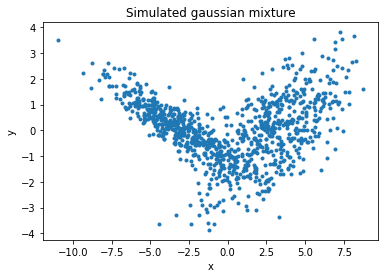

In [16]:
mean1 = [-3,0]
cov1 = [[5,-2],[-2,1]]

mean2 = [3,0]
cov2 = [[5,2],[2,2]]

d1 = np.random.multivariate_normal(mean1, cov1, 500)
d2 = np.random.multivariate_normal(mean2, cov2, 500)

mixt = np.concatenate((d1,d2))


plt.plot(mixt[:,0], mixt[:,1],".")
plt.title('Simulated gaussian mixture')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We note that the simulated gaussian mixture looks like the figures in the slides of the class.

$\textbf{4. Do you think a 2-components GMM could be appropriate for letter A? Why?}$

## Data analysis: Gaussian model

In this section, we analyse data coming from the Unistroke data set. 
We would like to know if a bivariate Gaussian mixture can make for a good representation of the letter A.

We use the mixture package from the library sklearn to avoid implementing ourselves the EM algorithm for estimating parameters of a Gaussian mixture.

$\textbf{1. Estimate a bivariate GMM on the letter A data set and provide the estimated parameters.}$



In [ ]:
We first load the necessary backend and the necessary library for plot to work correctly and to to our computations.

In [ ]:
import numpy as np
import re
import os
from sklearn import mixture
from scipy import stats
from os import listdir
from os.path import isfile, join
import matplotlib
from spherecluster import VonMisesFisherMixture
#matplotlib.use('TkAgg')
from matplotlib import pyplot as plt


We wrote here a function to read the Amerge.txt file.

In [ ]:
def read_data(letter : str):

    path = './Unistroke/'+letter+'merge.txt'
    with open(path, 'r') as f:
        nb_line = sum(1 for _ in f)
    with open(path, 'r') as f:
        data = np.zeros((nb_line,2))
        i = 0
        for line in f:
            data[i][0] = float(line.strip().split(" ")[0])
            data[i][1] = float(line.strip().split(" ")[1])
            i+=1
        return data

def read_and_merge(letter : str):
    files = os.listdir('./Unistroke/')
    regex = re.compile(r'^'+letter+'[0-9]')
    files = list(filter(regex.search, files))
    data = list()
    for file in files:
        with open("./Unistroke/"+file) as content: 
            for line in content:
                data.append((float(line.strip().split("\t")[0]),float(line.strip().split("\t")[1])))

    return np.array(data)

  We first read and plot the letter A data set after angular transformation. The transformation is the following :
  
  $$ x'_n = \frac{x_{n+1}-x_n}{|x_{n+1}-x_n|}$$
  
  We understand why the data points appear on a circle using this transformation as $|x'_n|=1$

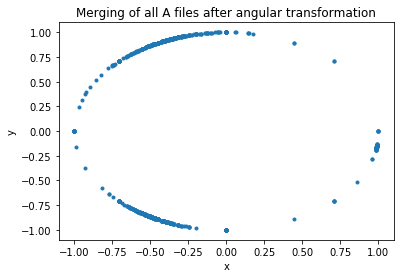

In [17]:
data = read_data("A")
plt.figure()
plt.plot(data[:,0], data[:,1],'.')
plt.title('Merging of all A files after angular transformation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


To make the estimation we use the function fit() from the gaussian\_mixture
package. The only parameter we define is the number of components of the Gaussian mixture, here n\_components=2. The algorithm fits the model using an EM algorithm for Gaussian mixtures.
The stopping criterion is reached when the change of likelihood between two iteration is less than $\textbf{tol}$. The maximum number of iteration is $\textbf{max_iter}$. The initialisation process is assured internally by the method \_initialize\_parameters(self , X, random\_state). We can see in this method that the initialisation process can be done using the k-mean algorithm or using random initial parameters. by default it will use a k-mean algorithm.
We chose to let every parameters set as the default ones.
We chose here to let the full freedom to the covariance matrices (option full).
The algorithm return the following estimated parameters for our data :

In [18]:
#EM algorithm for gaussian mixtures
gmm = mixture.GaussianMixture(2,covariance_type='full')
gmm.fit(data)
print("means : ",gmm.means_)
print("\n")
print("covs : ",gmm.covariances_)

means :  [[-0.36571287  0.9060224 ]
 [-0.29510373 -0.72483125]]


covs :  [[[0.03903012 0.01426564]
  [0.01426564 0.00634938]]

 [[0.27188755 0.0823439 ]
  [0.0823439  0.1156479 ]]]


The results obtained are the means and the covariance matrices of each of our 2 estimated Gaussian after the EM algorithm.

$\textbf{2. Label the data using the estimated model and show the pdf of the estimated GMM}$

To label the data we use the method predict from the Gaussian mixture.
The predict method use the fitted parameters from the function fit to estimate the probability of each data point to belong to one cluster or the other. 

/home/nathan/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


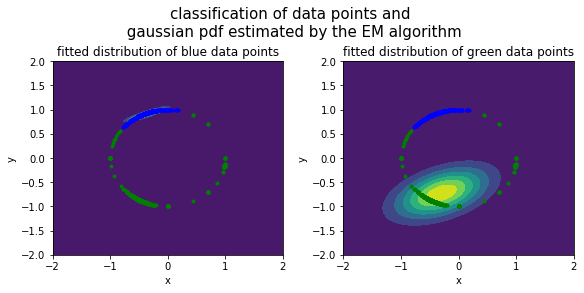

In [23]:
# 2
# meshgrid
labels = gmm.predict(data)
x = np.linspace(-2,2,500)
X,Y = np.meshgrid(x,x)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
# pdf
rv = stats.multivariate_normal(gmm.means_[0],gmm.covariances_[0])
rv2 = stats.multivariate_normal(gmm.means_[1],gmm.covariances_[1])
# color with classification
bool_label= list(map(bool,labels))
inv_bool_label = [not i for i in bool_label]  
data1 = data[bool_label]
data2 = data[inv_bool_label]
# plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4),constrained_layout=True)

axs[0].contourf(X,Y,rv.pdf(pos))
axs[0].plot(data1[:,0], data1[:,1],'.', color='g')
axs[0].plot(data2[:,0], data2[:,1],'.', color='b')
axs[0].set_title('fitted distribution of blue data points')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].contourf(X,Y,rv2.pdf(pos))
axs[1].plot(data1[:,0], data1[:,1],'.', color='g')
axs[1].plot(data2[:,0], data2[:,1],'.', color='b')
axs[1].set_title('fitted distribution of green data points')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

fig.suptitle('classification of data points and \n gaussian pdf estimated by the EM algorithm',fontsize=15)
fig.show()

$\textbf{3 (a) : Plot each marginal histogram and add the estimated mixture of univariate
Gaussian pdfs to the figure.}$



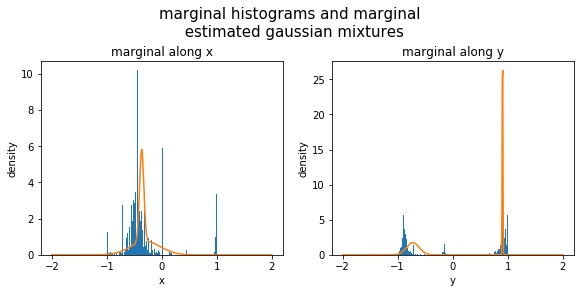

In [24]:
fig2, axs2 = plt.subplots(1, 2, figsize=(8, 4),constrained_layout=True)

axs2[0].hist(data[:,0],150,  density = True)
axs2[1].hist(data[:,1],150,  density = True)

mg = stats.norm(gmm.means_[0,0], gmm.covariances_[0,0,0])
mg2 = stats.norm(gmm.means_[0,1], gmm.covariances_[0,1,1])
mg3 = stats.norm(gmm.means_[1,0], gmm.covariances_[1,0,0])
mg4 = stats.norm(gmm.means_[1,1], gmm.covariances_[1,1,1])

axs2[0].plot(x,(mg.pdf(x)+mg3.pdf(x))*0.5)
axs2[1].plot(x,(mg2.pdf(x)+mg4.pdf(x))*0.5)
axs2[0].set_title('marginal along x')
axs2[1].set_title('marginal along y')

axs2[0].set_xlabel('x')
axs2[0].set_ylabel('density')
axs2[1].set_xlabel('y')
axs2[1].set_ylabel('density')

fig2.suptitle('marginal histograms and marginal \n estimated gaussian mixtures',fontsize=15)
fig2.show()

$ \textbf{3. (b) For each marginal, provide separate histograms of each cluster and add the estimated
 Gaussian pdf to the figure.}$

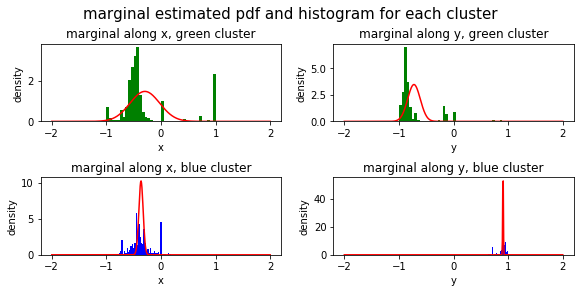

In [25]:
fig3, axs3 = plt.subplots(2, 2, figsize=(8, 4),constrained_layout=True)
bar_num = 40
axs3[0][0].hist(data1[:,0],bar_num,  density = True,color='g')
axs3[0][0].plot(x,(mg3.pdf(x)),color='r')
axs3[0][0].set_title('marginal along x, green cluster')

axs3[0][1].hist(data1[:,1], bar_num,  density = True,color='g')
axs3[0][1].plot(x,(mg4.pdf(x)),color='r')
axs3[0][1].set_title('marginal along y, green cluster')

axs3[1][0].hist(data2[:,0],bar_num,  density = True,color='b')
axs3[1][0].plot(x,(mg.pdf(x)),color='r')
axs3[1][0].set_title('marginal along x, blue cluster')

axs3[1][1].hist(data2[:,1],bar_num,  density = True,color='b')
axs3[1][1].plot(x,(mg2.pdf(x)),color='r')
axs3[1][1].set_title('marginal along y, blue cluster')

axs3[0][0].set_xlabel('x')
axs3[0][0].set_ylabel('density')
axs3[1][0].set_xlabel('x')
axs3[1][0].set_ylabel('density')
axs3[0][1].set_xlabel('y')
axs3[0][1].set_ylabel('density')
axs3[1][1].set_xlabel('y')
axs3[1][1].set_ylabel('density')


fig3.suptitle('marginal estimated pdf and histogram for each cluster ',fontsize=15)
fig3.show()

$\textbf{Plot each data point x i with some colourmap corresponding to}$ $P(Z_i = 1|X_i )$

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


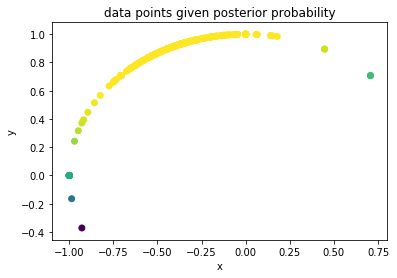

In [26]:
posterior_proba=gmm.predict_proba(data)
plt.scatter(data[:,0], data[:,1], c=np.log(posterior_proba[:,0]))
plt.title('data points given posterior probability')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

To compute $P(Z_i = 1|X_i )$, we use the predict_proba() function. It returns for each fitted gaussian the probability of each data points to be generated by the said Gaussian. This can be interpreted as a "soft" or continuous labelling of the data points. We see on the plot above a clear dichotomy between two sets of data points corresponding to the two different labelled clusters. This was the expected results. Using the log of the posterior probability helps for visualisation as the transition between the two cluster is too "sharp" without it.

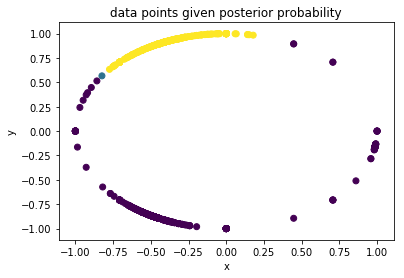

In [27]:
posterior_proba=gmm.predict_proba(data)
plt.scatter(data[:,0], data[:,1], c=posterior_proba[:,0])
plt.title('data points given posterior probability')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# GMM analysis of the primary data (non angular)

We will performed the same GMM analysis on the non angular data. First we plot data.

In [28]:
def read_and_merge(letter : str, clean = False):
    files = os.listdir('./Unistroke/')
    regex = re.compile(r'^'+letter+'[0-9]')
    files = list(filter(regex.search, files))
    data = list()
    for file in files:
        with open("./Unistroke/"+file) as content: 
            for num, line in enumerate(content):
                if clean == True and num != 0:
                    data.append((float(line.strip().split("\t")[0]),float(line.strip().split("\t")[1])))
                if clean == False:
                    data.append((float(line.strip().split("\t")[0]),float(line.strip().split("\t")[1])))
    return np.array(data)

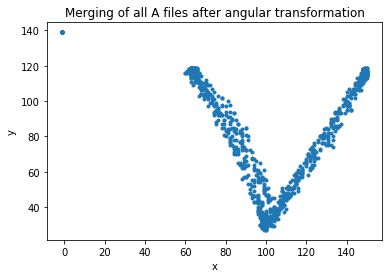

In [29]:
plt.figure()
data = read_and_merge("A")
plt.plot(data[:,0], data[:,1],'.')
plt.title('Merging of all A files after angular transformation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


We first note that clusters we would like to classify, the two line of the "V", could better corespond to 2d-gaussian than the angular data do. But data are insecting themself at the angle of the "V", which can confuse the classification of the EM algotithm. We also note that there exist a data point which is completely out of the "V" shape at (0,140). We presume that the point is a calibration point and we remove it from the data to have better results. 
Let's see how this algorithm classify this data.


/home/nathan/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


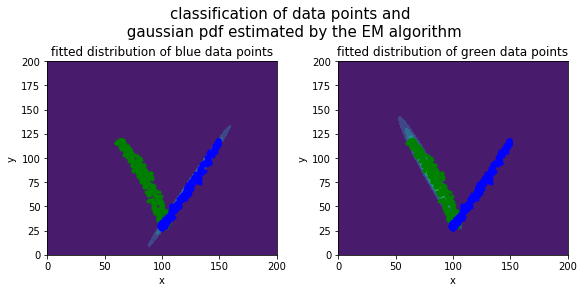

In [30]:
# meshgrid
data = read_and_merge("A", True)
gmm = mixture.GaussianMixture(2,covariance_type='full')
gmm.fit(data)
labels = gmm.predict(data)
x = np.linspace(0,200,500)
X,Y = np.meshgrid(x,x)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# pdf
rv = stats.multivariate_normal(gmm.means_[0],gmm.covariances_[0])
rv2 = stats.multivariate_normal(gmm.means_[1],gmm.covariances_[1])

# colors with classification
bool_label= list(map(bool,labels))
inv_bool_label = [not i for i in bool_label]  
data1 = data[bool_label]
data2 = data[inv_bool_label]

# plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4),constrained_layout=True)

axs[0].contourf(X,Y,rv.pdf(pos))
axs[0].plot(data1[:,0], data1[:,1],'.', color='g')
axs[0].plot(data2[:,0], data2[:,1],'.', color='b')
axs[0].set_title('fitted distribution of blue data points')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].contourf(X,Y,rv2.pdf(pos))
axs[1].plot(data1[:,0], data1[:,1],'.', color='g')
axs[1].plot(data2[:,0], data2[:,1],'.', color='b')
axs[1].set_title('fitted distribution of green data points')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

fig.suptitle('classification of data points and \n gaussian pdf estimated by the EM algorithm',fontsize=15)
fig.show()


Unlike with the angular data, we observe that sometimes EM classify well data and sometimes not. We observe this in the previous plot in running many time the corresponding code : sometimes the contour plot of gaussians doesn't fit at all bars of the "V". The change of results between two runs is due to the random initialisation using the K-mean algorithm. It seems that doing the angular transformation on data improves the classification quality. A reason for this is that the distribution before the angular transformation is too uniformly distributed and that doesn't allow for a good fit using a Gaussian mixture.

# 1. 2 / Mandatory Additionnal Questions

In [36]:
def unistroke_to_angular(uni_data):
    nb_lines = len(uni_data)
    ang_data = np.zeros((nb_lines, 2))
    ang_data = np.zeros((nb_lines, 2))
    for index in range(nb_lines):
        ang_data[index][0] = np.sqrt(uni_data[index][0] ** 2 + uni_data[index][1] ** 2)
        if uni_data[index][0] != 0:
            ang_data[index][1] = np.arctan(uni_data[index][1] / uni_data[index][0])
        else:
            ang_data[index][1] = np.pi / 2
    return ang_data

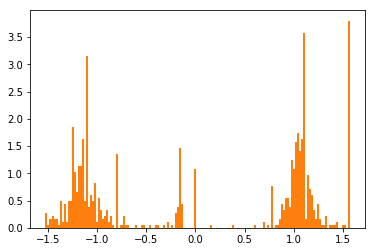

In [53]:
# Angular data histograms
ang_data = unistroke_to_angular(read_data("A"));
plt.hist(ang_data[:, 0], 150, density=True);
plt.hist(ang_data[:, 1], 150, density=True);

Just above is the histogram of the angle of the translated data. We can see that all radius are set to one, which can be explained by the fact that our A is represented by a circle, so all point are equidistant to the figure's center. 
Therfore our study will remain with only one variable instead of two.


# 1.2.2
Von Mises Law allows to approximate the circular normal distribution law. It is adapted to plot a distribution of a theta variable moving around a circle.

A Von Mises mixture will be a mixture as defined in the lectures where the family of distributions is only composed of Von mises distributions.

<img src="graphs/von_mises_distribution.png" alt="von_mises_distribution" width="200"/>

$${\displaystyle f(x\mid \mu ,\kappa )={\frac {{\rm {e}}^{\kappa \cos(x-\mu )}}{2\pi I_{0}(\kappa )}}}$$



# 1.2.3

Our study data set represents an A as a circle. Therefore a mixture of Von mises will be a better fit, as it is adapted to approximate circular distributions.
As in previous questions the study with angular data will require less variables which is more interesting in terms of complexity.


In [55]:
# 1.2.5

# Von Mises mixture fit with AMerge data, parameters

mix = VonMisesFisherMixture(2)
data = unistroke_to_angular(read_data(""))
mix = mix.fit(data)
#params examples : mix.weights_, mix.cluster_centers_, mix.labels

NameError: name 'VonMisesFisherMixture' is not defined

# 1.2.4


## E part

\begin{align*}
    &p(X,Z| \theta) = \prod_{i=1}^n \pi_0^{I_{(Z_i=0)}}(f(x_i|\mu_0,\kappa_0))^{I_{(Z_i=0)}} \pi_1^{I_{(Z_i=1)}}(f(x_i|\mu_1,\kappa_1))^{I_{(Z_i=1)}} \\
    \implies &\log(p(X,Z| \theta)) = \sum_{i=1}^n I_{(Z_i=0)} (\log(\pi_0)+\log(f(x_i|\mu_0,\kappa_0)) +I_{(Z_i=1)} (\log(\pi_1)+\log(f(x_i|\mu_1,\kappa_1)) \\
    \implies &\mathrm{E}_{Z|X}(\log(p(X,Z| \theta))) = \sum_{i=1}^n p(Z_i=0|X) (\log(\pi_0)+\log(f(x_i|\mu_0,\kappa_0)) + \\
     & \quad p(Z_i=1|X) (\log(\pi_1)+\log(f(x_i|\mu_1,\kappa_1)) 
\end{align*}





\begin{align*}
   p(Z_i=k|X_i) = \frac{p(X_i|Z_i=k) p(Z_i=k)}{p(X_i)} \\
\end{align*}

$$ p(X_i) = \pi_0 f(x_i|\mu_0,\kappa_0) +  \pi_1 f(x_i|\mu_1,\kappa_1)$$

$$ p(X_i|Z_i=0) = f(x_i|\mu_0,\kappa_0) $$

$$ p(Z_i=0) = \pi_0$$

$$ Q(\theta,\theta^0) = \sum_{i=1}^n p(Z_i=0|X,\theta^0) (\log(\pi_0)+\log(f(x_i|\mu_0,\kappa_0)) + \quad p(Z_i=1|X,\theta^0) (\log(\pi_1)+\log(f(x_i|\mu_1,\kappa_1)) $$

$$ \theta = (\mu_0,\mu_1,\pi_0,\pi_1,\kappa_0,\kappa_1) $$

## M part 

Let $p(Z_i=0|X,\theta^0)=T_{i,0} $ and $p(Z_1|X,\theta^0)=T_{i,1} $ then we can write :

$$ Q(\theta,\theta^0) = \sum_{i=1}^n T_{i,0} (\log(\pi_0)+\log(f(x_i|\mu_0,\kappa_0)) + T_{i,1} (\log(\pi_1)+\log(f(x_i|\mu_1,\kappa_1)) $$

We can maximise independently $(\pi_0,\pi_1)$, ($\mu_0,\kappa_0$) and ($\mu_1,\kappa_1$) because they all appear in diferent linear terms ( we need to maximise $(\pi_0,\pi_1)$ together because we have the constraint $\pi_0+\pi_1=1$).  

$$argmax_{(\pi_1,\pi_2)} Q(\theta,\theta^0) =  argmax_{(\pi_1,\pi_2)} \sum_{i=1}^n T_{i,0} \log(\pi_0) + \sum_{i=1}^n T_{i,1} \log(\pi_1)$$

### Estimation of $\pi_0, \pi_1$ :


    
Posing $T_0= \sum_{i=1}^n T_{i,0}$ and $T_1= \sum_{i=1}^n T_{i,1}$ :

$$argmax_{(\pi_1,\pi_2)} Q(\theta,\theta^0) = argmax_{(\pi_1,\pi_2)}  T_0 \log(\pi_0) +T_1 \log(\pi_1)$$

with $T_0$ and $T_1$ constant.
Since we have a constraint $\pi_0+\pi_1=1$ we need to use a Lagrange multiplier method.

We pose $$f(\pi_0,\pi_1)=T_0 \log(\pi_0) +T_1 \log(\pi_1)$$

$$g(\pi_0,\pi_1)=\pi_0+\pi_1-1$$

The Lagrangian function is then

$$ L(\pi_0,\pi_1)=f(\pi_0,\pi_1)+ \lambda g(\pi_0,\pi_1) $$

We derive according to each variable to get the following system and we solve for each equation equals 0:

\begin{align*}
    \frac{\partial L(\pi_0,\pi_1)}{\partial \pi_0} & = 0 = \frac{T_0}{\pi_0} +\lambda\\
    \frac{\partial L(\pi_0,\pi_1)}{\partial \pi_1} & = 0 =\frac{T_1}{\pi_1} +\lambda \\
    \frac{\partial L(\pi_0,\pi_1)}{\partial \lambda} & = 0 = \pi_0 + \pi_1 -1\\
\end{align*}

We then find 
\begin{align*}
      \pi_0 &= \frac{-T_0}{\lambda} \\
     \pi_1 &= \frac{-T_1}{\lambda} \\
     \pi_0 & + \pi_1 =1\\
\end{align*}

summing the two equations above we find

\begin{align*}
     1 &= \frac{-T_0}{\lambda}- \frac{T_1}{\lambda} \implies \lambda = -T_0 -T_1 \\
     & \implies  \pi_0 = \frac{T_0}{T_0 + T_1} \\
     & \implies  \pi_1 = \frac{T_1}{T_0 + T_1}
\end{align*}




### Estimation of $\mu_0, \mu_1$ :



We search $\mu^{t+1} = (\mu_0^{t+1}, \mu_1^{t+1})$ such that :

$$\mu^{t+1} = argmax_{(\mu_0, \mu_1)}Q(\theta, \theta^t)$$


We derive $Q(\theta, \theta^t)$ according to $\mu_0$ to find a minimum :

\begin{align*}
    \frac{\partial Q(\theta, \theta^t)}{\partial \mu_0} &= \sum_{i = 1}^np(z_i = 0 | x_i, \theta)\kappa\sin{x_i - \mu_0}\\
    &= \sum_{i = 1}^np(z_i = 0 | x_i, \theta)\kappa(\sin{x_i}\cos{\mu_0} - \cos{x_i}\sin{\mu_0})\\
    &= \sum_{i = 1}^np(z_i = 0 | x_i, \theta)\kappa\sin{x_i}\cos{\mu_0} - \sum_{i = 1}^np(z_i = 0 | x_i, \theta)\kappa\cos{x_i}\sin{\mu_0}
\end{align*}

And therefore, we have :

\begin{align*}
    &\frac{\partial Q(\theta, \theta^t)}{\partial \mu_0} = 0\\
    \Longleftrightarrow &\sum_{i = 1}^np(z_i = 0 | x_i, \theta)\kappa\sin{x_i}\cos{\mu_0} = \sum_{i = 1}^np(z_i = 0 | x_i, \theta)\kappa\cos{x_i}\sin{\mu_0}\\
    \Longleftrightarrow &\tan\mu_0 = \frac{\sum_{i = 1}^np(z_i = 0 | x_i, \theta)\sin{x_i}}{\sum_{i = 1}^np(z_i = 0 | x_i, \theta)\cos{x_i}}
\end{align*}


As result, we estimate $\mu_0^{t+1}$ with :

$$\mu_0^{t+1} = \arctan\frac{\sum_{i = 1}^np(z_i = 0 | x_i, \theta^t)\sin{x_i}}{\sum_{i = 1}^np(z_i = 0 | x_i, \theta^t)\cos{x_i}}$$

We get a similar result for $ \mu_1$ : 

$$\mu_0^{t+1} = \arctan\frac{\sum_{i = 1}^np(z_i = 1 | x_i, \theta^t)\sin{x_i}}{\sum_{i = 1}^np(z_i = 1 | x_i, \theta^t)\cos{x_i}}$$

### Estimating $\kappa^{t+1}$

By a similar mechanism, we derive $Q(\theta, \theta^t)$ by $\kappa$ : 


\begin{align*}
    \frac{\partial Q(\theta, \theta^t)}{\partial \kappa_0} = \sum_{i = 1}^np(z_i|x_i, \theta^t)\cos{(x_i - \mu_0)} + p(z_i|x_i, \theta^t)\frac{I_0'(\kappa_0)}{I_0(\kappa_0)}
\end{align*}


And therefore : 

\begin{align*}
    &\frac{\partial Q(\theta, \theta^t)}{\partial \kappa_0} = 0\\
    \Longleftrightarrow &\frac{I_0'(\kappa_0)}{I_0(\kappa_0)} = \frac{\sum_{i = 1}^np(z_i|x_i, \theta^t)\cos{(x_i - \mu_0)}}{\sum_{t+1}^np(z_i|x_i, \theta^t)}
\end{align*}


we notice here that the right term does not depend on $\kappa_0$. We pose:
$$A= - \frac{\sum_{i = 1}^np(z_i|x_i, \theta^t)\cos{(x_i - \mu_0)}}{\sum_{t+1}^np(z_i|x_i, \theta^t)}$$
we can then easily integrate :

\begin{align*}
    \log{I_0(\kappa_0)} & = \kappa_0 A \\
   \Longleftrightarrow & I_0(\kappa_0)=e^{\kappa_0 A} \\
   \Longleftrightarrow & \sum_{n=0}^{\infty} \frac{1}{n! \Gamma(n+1)} \frac{\kappa_0^{2n}}{4^n} =\sum_{n=0}^{\infty} \frac{(A \kappa_0)^n}{n!}
\end{align*}

We have a term by term equality allowing us to choose n=1 :

$$A \kappa_0 = \frac{1}{\Gamma(2)} \frac{\kappa_0^2}{4}$$

we solve it and find two solution :
$\kappa_0 = \frac{A}{4} \text{ or } \kappa_0 = 0$

We keep only the first one and hence we have the final results for each of our parameters.
The EM algorithm now consists in iterating between those two steps until we reach convergence,
characterised for example by a $\textbf{tol}$ parameters such that :

$$ ||\theta^k-theta^{k+1}|| < tol $$

